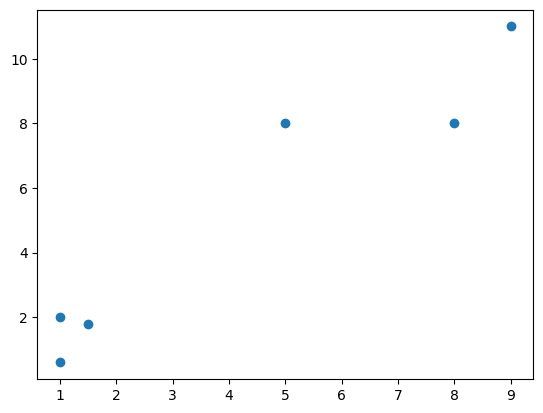

In [3]:
import numpy as np
import matplotlib.pyplot as plt
x = np.array([[1,2],[1.5,1.8],[5,8],[8,8],[1,0.6],[9,11]])
plt.scatter(x[:,0],x[:,1])
plt.show()

In [7]:
def fit(data,k=2,max_iter=100):
    means =[]
    for i in range(k):
        means.append(data[i])
    for i in range(max_iter):
        clusters = []
        for j in range(k):
            clusters.append([])
        for point in data:
            distances = [((point-m)**2).sum() for m in means]
            min_distance = min(distances)
            l = distances.index(min_distance)
            clusters[l].append(point)
        change = False
        for i in range(k):
            new_mean = np.average(clusters[i],axis=0)
            if not np.array_equal(means[i],new_mean):
                change = True
            means[i] = new_mean
        if not change:
            break
    return means

In [12]:
def predict(data,means):
    predictions = []
    for point in data:
        distances = [((point-m)**2).sum() for m in means]
        min_distance = min(distances)
        l = distances.index(min_distance)
        predictions.append(l)
    return predictions

In [32]:
means = fit(x)
means = np.array(means)
means

array([[1.16666667, 1.46666667],
       [7.33333333, 9.        ]])

In [13]:
y_out = predict(x,means)
y_out

[0, 0, 1, 1, 0, 1]

In [34]:
means[:,0]

array([1.16666667, 7.33333333])

<function matplotlib.pyplot.show(close=None, block=None)>

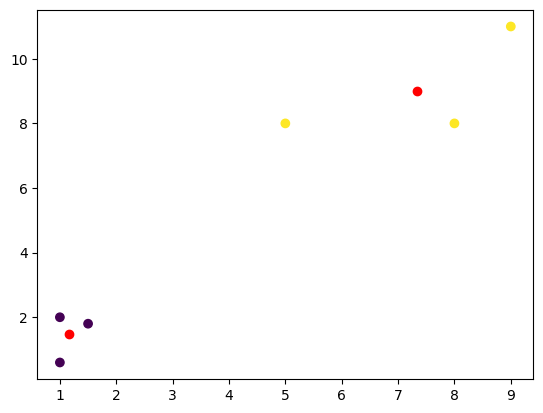

In [33]:
plt.scatter(x[:,0],x[:,1],c=y_out)
plt.scatter(means[:,0],means[:,1],c='red')
plt.show